In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os

# Image processing libraries
import cv2 
import dlib

# Local library
import Basic_Library as blib


1. Process for static image.

In [2]:
# Set image path.
img_path = os.path.join('data','Eyes_Open.jpg')

# Import image.
img = cv2.imread(img_path)

# Transform image to grayscale for computation.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Import face detector.
detector = dlib.get_frontal_face_detector()

# Import landmark predictor.
landmark_predictor_path = os.path.join('models', 'shape_predictor_68_face_landmarks.dat' )
predictor = dlib.shape_predictor(landmark_predictor_path)

In [3]:
# Get frontface bbox and landmarks and display on the image for the open eyes.
faces = detector(img_gray, 1)

nb_faces_front=len(list(enumerate(faces)))
print("Front facial detector found {0} faces".format(nb_faces_front))

Front facial detector found 1 faces


In [4]:
# Call function largest_front to get the principal face in the image.
principal_face = blib.largest_front(faces)

In [5]:
principal_face

rectangle(485,1125,1635,2275)

In [6]:
# Call the predictor and the function shape_to_np to get a list of facial landmark coordinates.
landmarks = predictor(img_gray, principal_face)
landmarks = blib.shape_to_np(landmarks)

In [7]:
# Call function eye_bboxes to obtain the bboxes for the left and the right eye.
left_eye_bbox, right_eye_bbox = blib.eye_bboxes(landmarks)

In [8]:
# Call function sleepy to determine if the eyes in the image are enough closed to indicate sleepy condition.
sleep = blib.sleepy(left_eye_bbox, right_eye_bbox, thresh = 0.15)
print('Is the driver sleepy? ', sleep)

Is the driver sleepy?  False


In [9]:
# Call function imprint_on_img to print the detected features on the input image.
img2 = blib.imprint_on_img(img, principal_face, landmarks, left_eye_bbox, right_eye_bbox)

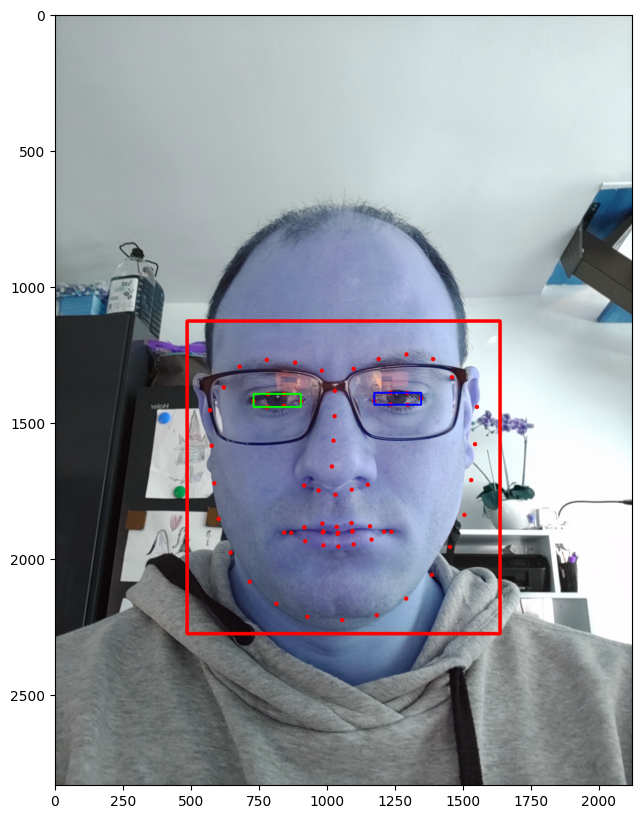

In [10]:
plt.figure(figsize=(12,10))
plt.imshow(img2)

2. Process for video; we will store and output it.

In [11]:
# Select path and import video.
video_path = os.path.join('data', 'Face_and_Eyes.mp4' )
cap = cv2.VideoCapture(video_path)


In [12]:
# Get the video framerate.
fps = cap.get(cv2.CAP_PROP_FPS)
print(f"Frame Rate: {fps} frames per second")

Frame Rate: 30.0 frames per second


In [ ]:
# Loop through the video frames, make modifications and collate into new video.
modified_frames = []

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Get the number of faces on the frame and choose only the largest one.

    

In [ ]:
modified_frames = []

        # Loop through video frames
        while True:
            ret, frame = video_capture.read()
            if not ret:
                break

            # Perform processing on each frame (e.g., resizing and padding)
            modified_frame = resize_and_pad(frame, target_size=(500, 500))

            # Perform face and landmark detection
            modified_frame = detect_face_landmarks(modified_frame)

            # Append the modified frame to the list
            modified_frames.append(modified_frame)


In [ ]:
video_capture = cv2.VideoCapture(uploaded_file)

        # Placeholder for modified frames
        modified_frames = []

        # Loop through video frames
        while True:
            ret, frame = video_capture.read()
            if not ret:
                break

            # Perform processing on each frame (e.g., resizing and padding)
            modified_frame = resize_and_pad(frame, target_size=(500, 500))

            # Perform face and landmark detection
            modified_frame = detect_face_landmarks(modified_frame)

            # Append the modified frame to the list
            modified_frames.append(modified_frame)